In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [38]:
df = pd.read_csv("../data/adult.csv")

df = df.replace("?", pd.NA).dropna()
df.drop(columns="Unnamed: 0", inplace=True)

valid_salaries = ["<=50K", ">50K"]
df["salary"].isin(valid_salaries)

valid_salaries_k = range(10, 1000)
df["salary K$"].isin(valid_salaries_k)

0        True
1        True
2        True
3        True
4        True
         ... 
32556    True
32557    True
32558    True
32559    True
32560    True
Name: salary K$, Length: 30162, dtype: bool

# Task 1
Print the count of men and women in the dataset.

In [39]:
print((df["sex"].str.capitalize() == "Male").sum())
print((df["sex"].str.capitalize() == "Female").sum())

20380
9782


# Task 2
Find the average age of men in dataset

In [40]:
df[df["sex"].str.capitalize() == "Male"]["age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [41]:
poland_count = (df["native-country"].str.capitalize() == "Poland").sum()
poland_percentage = poland_count / len(df) * 100

poland_percentage

0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [42]:
higher_50k = df[df["salary"] == ">50K" ]
higher_50k["age"].mean()
higher_50k["age"].std()

less_50k = df[df["salary"] != "<=50K"]
less_50k["age"].mean()
less_50k["age"].std()

10.269632835673852

# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [43]:
higher_education = ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
without_higher_education = higher_50k[~higher_50k["education"].isin(higher_education)]

without_higher_education

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary,salary K$
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K,307
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K,116
55,43,Private,Some-college,Married-civ-spouse,Tech-support,Husband,White,Male,40,United-States,>50K,341
67,53,Private,HS-grad,Married-civ-spouse,Adm-clerical,Wife,White,Female,40,United-States,>50K,225
68,49,Self-emp-inc,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,>50K,194
...,...,...,...,...,...,...,...,...,...,...,...,...
32462,48,Self-emp-inc,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,50,United-States,>50K,343
32518,57,Local-gov,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,40,United-States,>50K,116
32519,46,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,48,United-States,>50K,239
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K,173


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [44]:
education_stats = df.groupby("education")["age"].describe()

education_stats

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [45]:
df_men = df[df["sex"] == "Male"].copy()
df_men.loc[:, "is married"] = df_men["marital-status"].str.startswith("Married")

salary_comparison = df_men.groupby(["is married", "salary"]).size().unstack(fill_value=0)

married_more_50k = salary_comparison.loc[True, ">50K"]
non_married_more_50k = salary_comparison.loc[False, ">50K"]

total_married = salary_comparison.loc[True].sum()
total_non_married = salary_comparison.loc[False].sum()

married_proportion = married_more_50k / total_married
non_married_proportion = non_married_more_50k / total_non_married

print(f"Proportion of married men who earns more than 50K: {married_proportion:.2f}")
print(f"Proportion of non married men who earns more than 50K: {non_married_proportion:.2f}")

Proportion of married men who earns more than 50K: 0.45
Proportion of non married men who earns more than 50K: 0.09


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [46]:
max_working_hours = df[df["hours-per-week"] == df["hours-per-week"].max()]

max_working_hours.shape[0]

78

# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

Text(0.5, 1.0, 'Correlation Matrix')

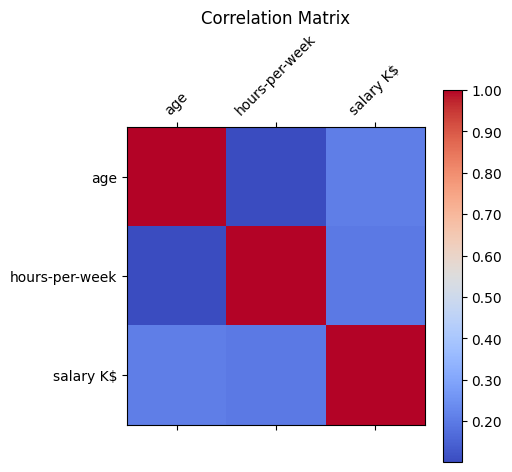

In [103]:
import numpy as np

corr = df.corr()

corr_map = plt.matshow(corr, cmap="coolwarm")
plt.colorbar(corr_map, format="%.2f")

plt.xticks(np.arange(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(np.arange(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
